In [20]:
# Modified from
# http://dpmartin42.github.io/posts/r/imbalanced-classes-part-1
# http://dpmartin42.github.io/posts/r/imbalanced-classes-part-2

library(pROC)
library(PRROC)
library(caret) 


#Class1 = 0
#Class2 =1


#Calc AUPRC
calc_auprc <- function(model, data){
  
  index_class2 <- data$Class == "Class2"
  index_class1 <- data$Class == "Class1"
  
  predictions <- predict(model, data, type = "prob")
  
  pr.curve(predictions$Class2[index_class2],
           predictions$Class2[index_class1],
           curve = TRUE) 
}


#Calc AUROC
calc_auroc <- function(model, data){
  
  index_class2 <- data$Class == "Class2"
  index_class1 <- data$Class == "Class1"
  
  predictions <- predict(model, data, type = "prob")
  
  roc.curve(predictions$Class2[index_class2],
            predictions$Class2[index_class1],
            curve = TRUE) 
}

In [15]:
train <- twoClassSim(500,
                           intercept = 0,
                           linearVars = 20,
                           noiseVars = 10)

test  <- twoClassSim(500,
                           intercept = 0,
                           linearVars = 20,
                           noiseVars = 10)

In [16]:
ctrl <- trainControl(method = "repeatedcv",
                     number = 4,
                     repeats = 2,
                     summaryFunction = twoClassSummary,
                     classProbs = TRUE)

fit <- train(Class ~ .,
                  data = train,
                  method = "rf",
                  verbose = FALSE,
                  parallel= TRUE)


  Precision-recall curve

    Area under curve (Integral):
     0.9523548 

    Area under curve (Davis & Goadrich):
     0.9523554 

    Curve for scores from  0.286  to  0.96 
    ( can be plotted with plot(x) )


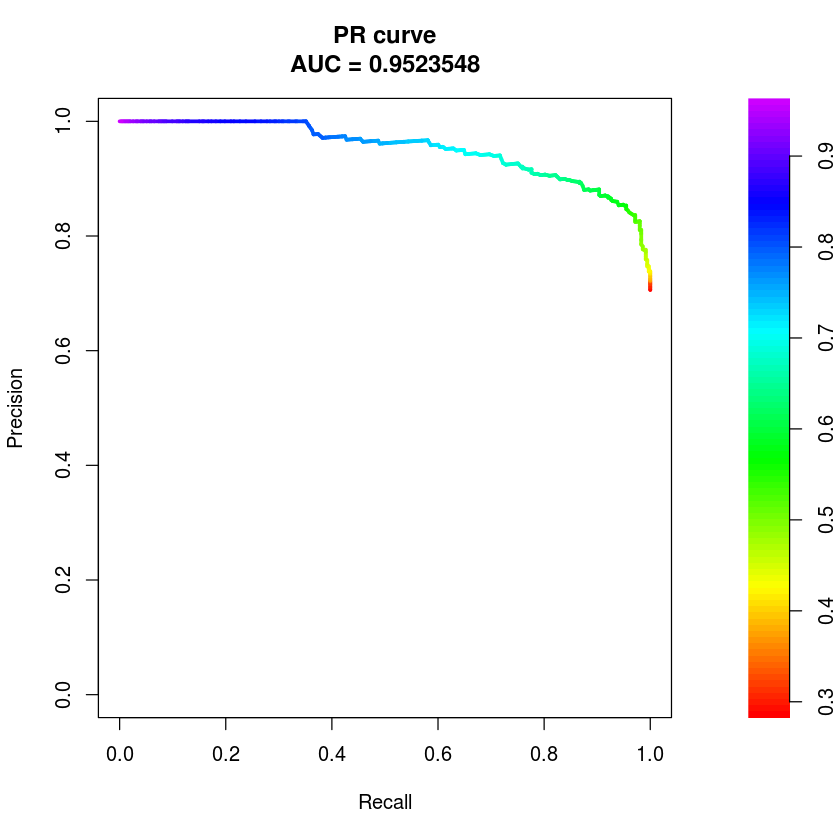

In [30]:
calc_auprc(fit,test)
plot(calc_auprc(fit,test))


  ROC curve

    Area under curve:
     0.8972269 

    Curve for scores from  0.286  to  0.96 
    ( can be plotted with plot(x) )


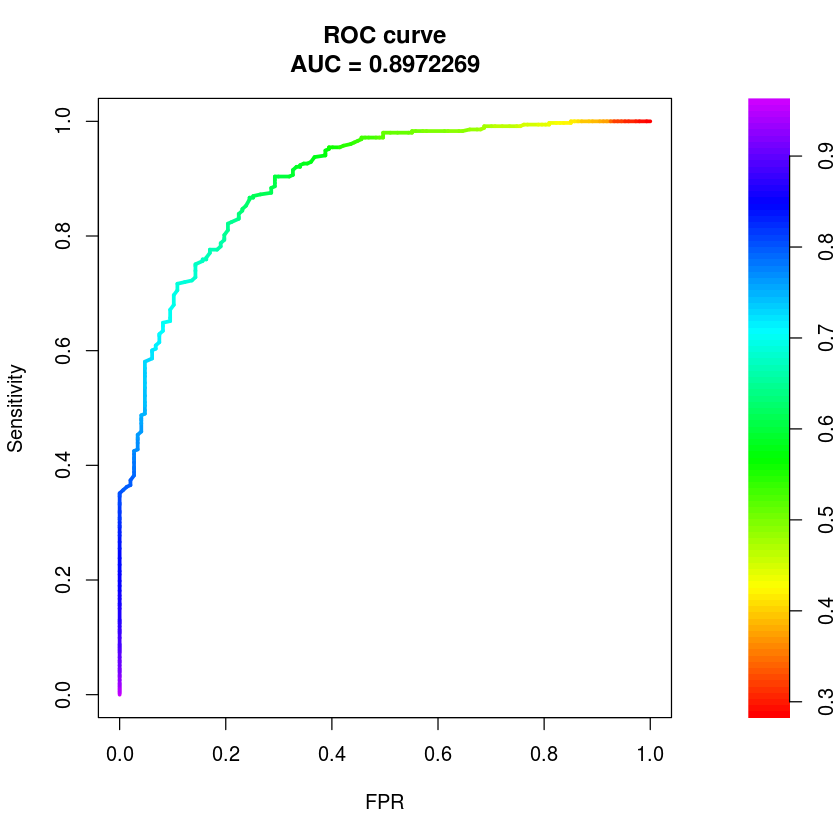

In [31]:
calc_auroc(fit,test)
plot(calc_auroc(fit,test))